## Install libraries

In [3]:
!pip install -q oddt
!pip install -q rdkit
!pip install -q py3Dmol

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 21.9 MB/s eta 0:00:00


## Load CafChem

In [2]:
!git clone https://github.com/MauricioCafiero/CafChem.git

from CafChem.oddt_sims import *
import pandas as pd

Cloning into 'CafChem'...
remote: Enumerating objects: 1197, done.
remote: Counting objects: 100% (380/380), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 1197 (delta 358), reused 268 (delta 268), pack-reused 817 (from 2)
Receiving objects: 100% (1197/1197), 60.34 MiB | 15.50 MiB/s, done.
Resolving deltas: 100% (702/702), done.


## Define one reference molecules and a list of test molecules

In [3]:
ref_mol = '[NH3+]CCc1ccc(O)cc1'
test_mols =['O=C([O-])CCc1ccc(OC)cc1', 'c1ccccc1']

## Loop to calculate similarity between all tests and the ref
- files for best ref and test for every molecule will be saved
- can use three types of similarity: usr, usrcat and electroshape

In [4]:
images = []
for i,mol in enumerate(test_mols):

  test = conformers([mol],10)
  confs = test.get_confs()
  expanded = test.expand_all_confs()

  # first is name of folder to hold files,
  # second is name of molecule. If no name then just number them
  mol_name = f'mol{i}'
  test.xyz_to_sdf('test', mol_name)

  # ref mol, folder name to hold ref files, name of ref
  ref_name = 'doparef'
  test.make_ref_conf(ref_mol, 'ref', ref_name)

  # compare with electroshape, can also use 'usr' and 'usrcat'
  best_list, img = test.compare_mols('electroshape')
  images.append(img)

The overall best match is reference conformation 3 and test conformation 3: 0.723
The overall best match is reference conformation 2 and test conformation 4: 0.538


## images list contains images of the ref and test conformations
- view each one

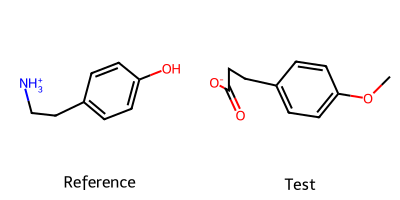

In [6]:
images[0]

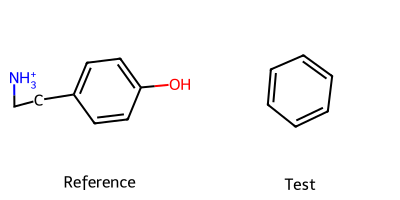

In [8]:
images[1]